<a id="introduction"></a>
**INTRODUCTION**

* A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

* A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.


![](https://images.medicinenet.com/images/article/main_image/stroke-symptoms-and-treatment.jpg)

<strong> Attribute Information </strong>
*  id: unique identifier
*  gender: "Male", "Female" or "Other"
*  age: age of the patient
*  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*  ever_married: "No" or "Yes"
*  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*  Residence_type: "Rural" or "Urban"
*  avg_glucose_level: average glucose level in blood
*  bmi: body mass index
*  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*  stroke: 1 if the patient had a stroke or 0 if not <br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### A) Data Cleaning.

**1. Import libraries.**

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')

**2. Load the data and overview it.**

In [146]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [147]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**3. Drop unneeded column(s).**

In [149]:
data = data.drop('id', axis=1)

In [150]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**4. Check for null values.**

In [151]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**5. Fill/drop null values.**

In [152]:
data['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [153]:
mean = data['bmi'].mean()

data['bmi'] = data['bmi'].fillna(mean)

In [154]:
data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

**6. Check for irregular data entries.**

In [155]:
data['age'] = np.where(data['age']<15, np.nan, data['age'])
data['age'].describe()

count    4411.000000
mean       48.988211
std        18.615061
min        15.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

In [156]:
data['age'].isnull().sum()

699

In [157]:
mean = data['age'].mean()
mean

48.98821128995693

In [158]:
mean = round(mean,1)
mean

49.0

In [159]:
data['age'] = data['age'].fillna(mean)
data['age'].isna().sum()

0

<b> `gender`

In [160]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [161]:
np.where(data['gender']=='Other')

(array([3116], dtype=int64),)

In [162]:
data = data.drop(3116)

In [163]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [164]:
for i in data.select_dtypes(['O','int']):
    print(i)

gender
hypertension
heart_disease
ever_married
work_type
Residence_type
smoking_status
stroke


In [165]:
for i in data.select_dtypes(['O','int']):
    print(data[i].value_counts(), end='\n\n')

Female    2994
Male      2115
Name: gender, dtype: int64

0    4611
1     498
Name: hypertension, dtype: int64

0    4833
1     276
Name: heart_disease, dtype: int64

Yes    3353
No     1756
Name: ever_married, dtype: int64

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

0    4860
1     249
Name: stroke, dtype: int64



**7. Check for outliers.**

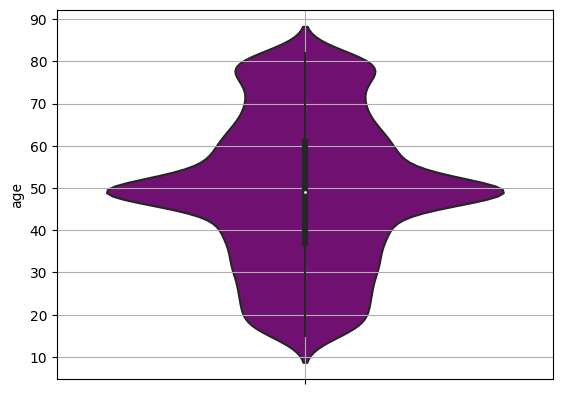

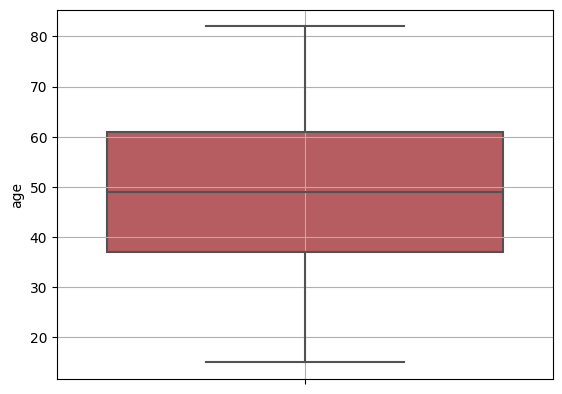

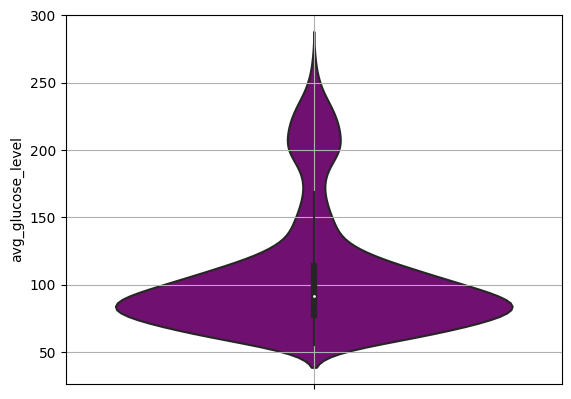

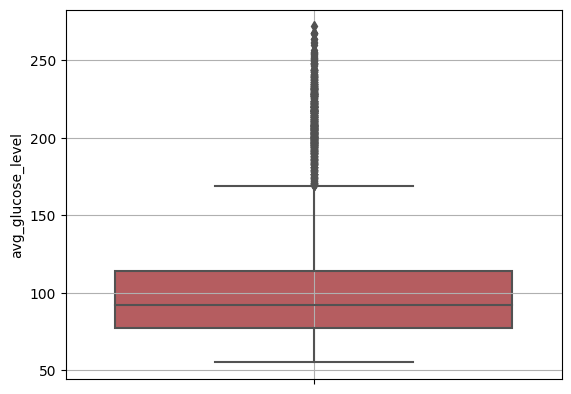

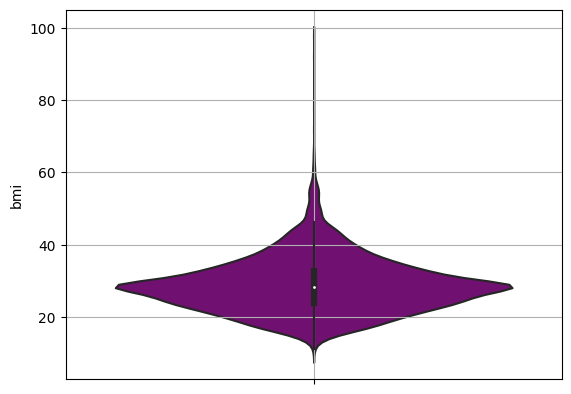

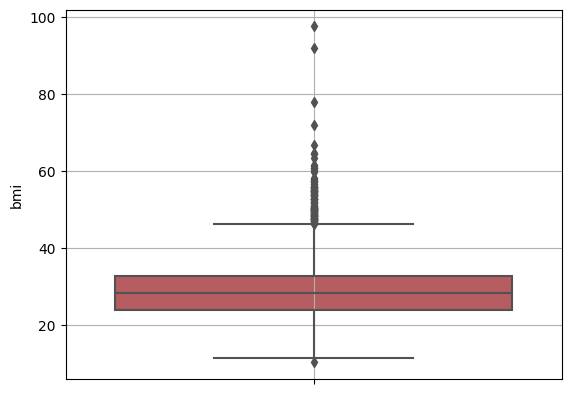

In [166]:
for i in data.select_dtypes('float'):
    sns.violinplot(y=data[i],color='purple')
    plt.grid()
    plt.show()
    sns.boxplot(y=data[i], color='r')
    plt.grid()
    plt.show()

**8. Drop outliers.**

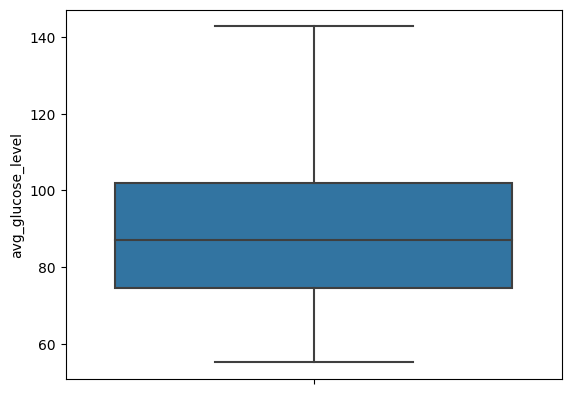

In [167]:
condition1 = data['avg_glucose_level']>0
condition2 =  data['avg_glucose_level']<143

guess = data['avg_glucose_level'][(condition1) & (condition2)]

sns.boxplot(y=guess);

In [168]:
rows_to_drop = np.where(data['avg_glucose_level']>143)
rows_to_drop = rows_to_drop[0].tolist()
rows_to_drop
data = data.drop(rows_to_drop)

<AxesSubplot:ylabel='bmi'>

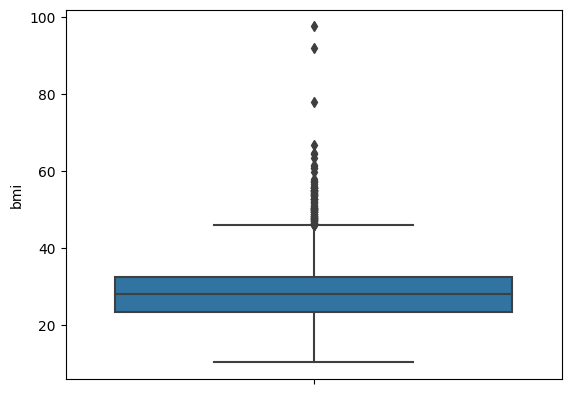

In [169]:
sns.boxplot(y = data['bmi'])

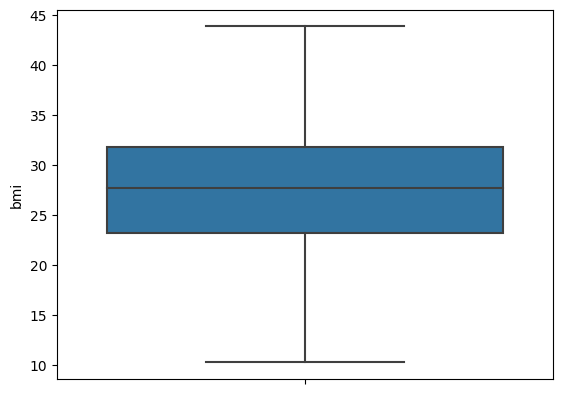

In [170]:
condition2 =  data['bmi']<44

guess = data['bmi'][condition2]

sns.boxplot(y=guess);

In [171]:
rows_to_drop = np.where(data['bmi']>44)
rows_to_drop = rows_to_drop[0].tolist()
rows_to_drop
data = data.drop(rows_to_drop, errors='ignore')

In [172]:
data.shape

(4198, 11)

In [173]:
data.to_csv('newdata.csv')

### B) Data Analysis.


Hint:
><i> Questions 1-6 have their focus only on those with `stroke` being 1. Filter this group out of the entire data and assign it to another variable name. Use this for your plots.

In [174]:
df = data[data['stroke'] == 1]

In [175]:
(df['stroke']==1).all()

True

#### Or

In [176]:
df = data.groupby('stroke').get_group(1)

In [177]:
(df['stroke']==1).all()

True

In [178]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


**1. How many married people had stroke from the data? How many were unmarried?**

>**Visualise this with an apporpraite plot.**

>**From this, what can you infer?**

In [179]:
df['ever_married'].value_counts().values[0]

129

In [180]:
df['ever_married'].value_counts().values[1]

24

#### Or

In [181]:
df[df['ever_married']=='Yes'].shape[0]

129

In [182]:
df[df['ever_married']=='No'].shape[0]

24

#### Or

In [183]:
len(df[df['ever_married']=='Yes'])

129

In [184]:
len(df[df['ever_married']=='No'])

24

#### Or

In [185]:
(df['ever_married']=='No').sum()

24

In [ ]:
(df['ever_married']=='Yes').sum()

<b>Visualising.

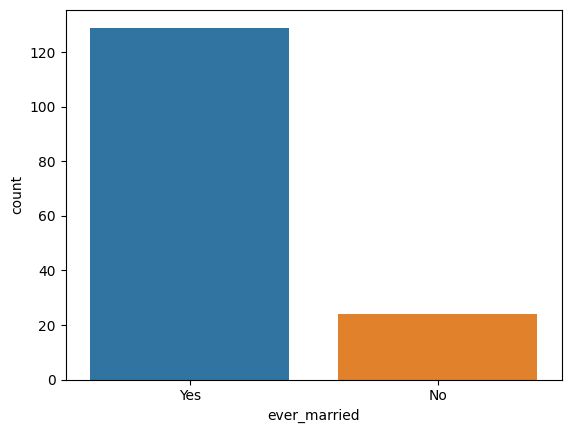

In [186]:
sns.countplot(df['ever_married']);

Married people are more prone to having stroke than unmarried ones.

<b>2. Of all work types, which one is not advisable for an individual to engage in, if he wants to avoid stroke.
> For individuals with stroke, visualise their various work types using a countplot. Add an appropraite title, ylabel and xlabel.
    
> What can you infer?

In [192]:
import sys
sys.version

'3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]'

In [220]:
sns.set()

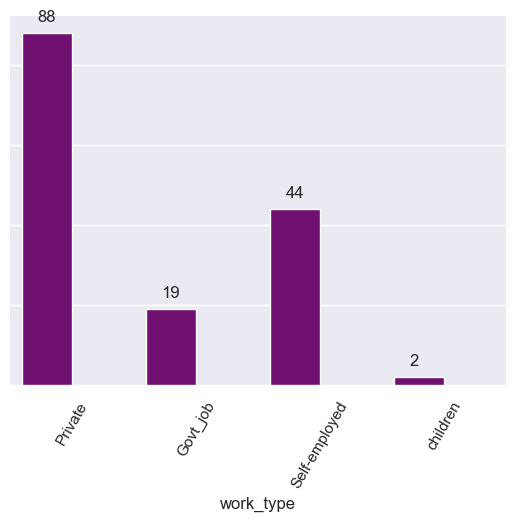

In [221]:
fig, ax = plt.subplots()

plot = sns.countplot(df['work_type'], color = 'purple', ax = ax);

for i in plot.patches:
    plot.annotate(text = i.get_height(), 
                  xy = (i.get_x()+0.12, i.get_height()+3))
    i.set_width(0.4)
    
for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_visible(False)
    
plt.ylabel('');

ax.tick_params(axis = 'y', left = False, labelleft = '')
ax.tick_params(axis = 'x', bottom = False, rotation = 60)

People working in the private sector are at a higher risk of having stroke.

<b>3. Of those having stroke, what were their `smoking_status`?
    
> Visualise each of these groups.
    
> Make an inference.

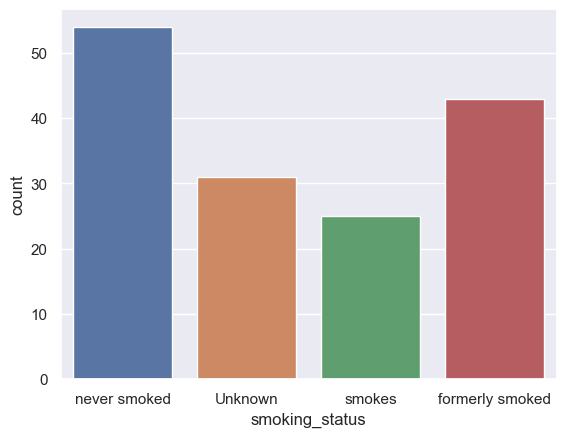

In [223]:
sns.countplot(df['smoking_status']);

People who smokes rarely have stroke while those... 


<b>4. Mr Philip wants to avoid stroke by all means. He is also seeking a place of residence either in his hometown or in the city. Convince him on which `residence_type` should be appropraite for him. <i><u>The use of multiple plots is advisable.

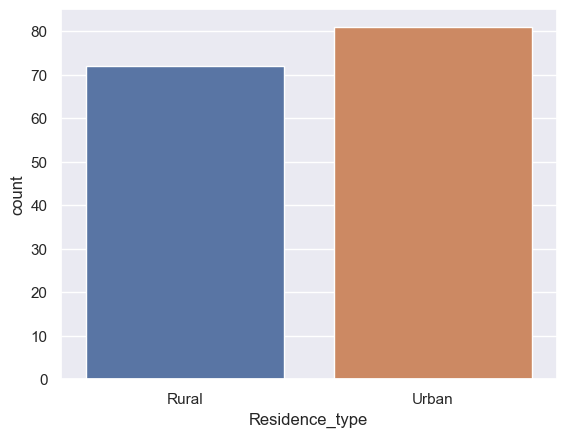

In [225]:
sns.countplot(df['Residence_type']);

In [227]:
values = df['Residence_type'].value_counts()
values

Urban    81
Rural    72
Name: Residence_type, dtype: int64

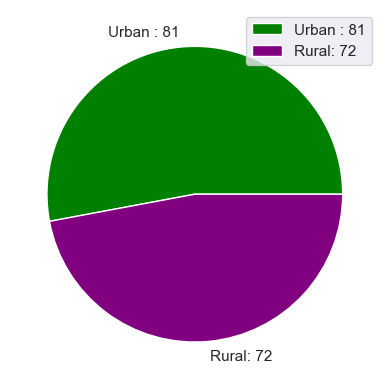

In [238]:
plt.pie(values, labels = ['Urban : 81', 'Rural: 72'], 
        colors = ['green','purple']);

plt.legend();

<b>5. From the data, people with hypertension have more risk to have a stroke. True or False?

False

In [239]:
df['hypertension'].value_counts()

0    118
1     35
Name: hypertension, dtype: int64

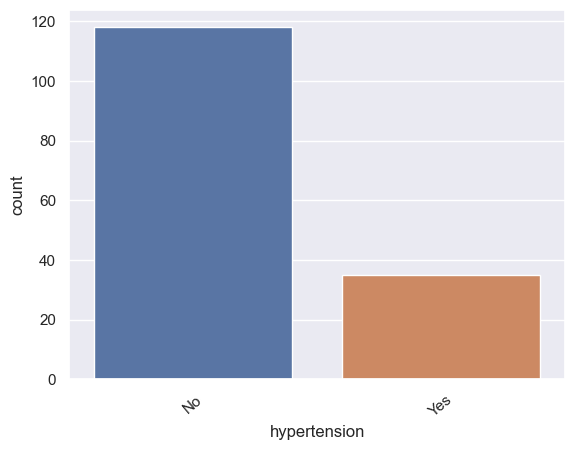

In [249]:
sns.countplot(df['hypertension'])
plt.xticks([0,1], ['No','Yes'], rotation = 40);

<b>6. From the data, people without any previous heart disease have more risk to have a stroke. True or False?

True

In [251]:
df['heart_disease'].value_counts()

0    133
1     20
Name: heart_disease, dtype: int64

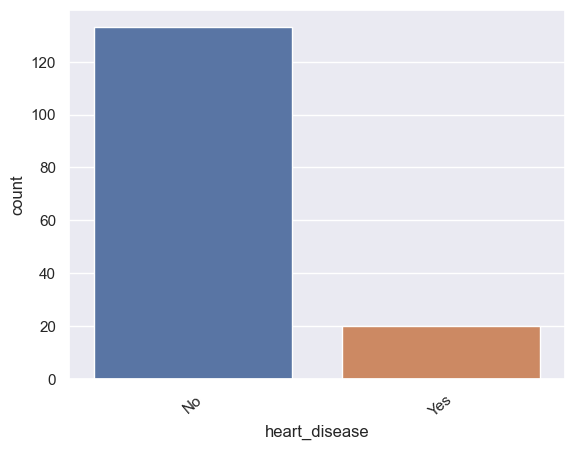

In [250]:
sns.countplot(df['heart_disease'])
plt.xticks([0,1], ['No','Yes'], rotation = 40);

<b>7. On subplots, give the relationships between:
> `age` and `avg_glucose_level`.
    
> `age` and `bmi`
    
Make a comment on their relationships.

<AxesSubplot:xlabel='age', ylabel='bmi'>

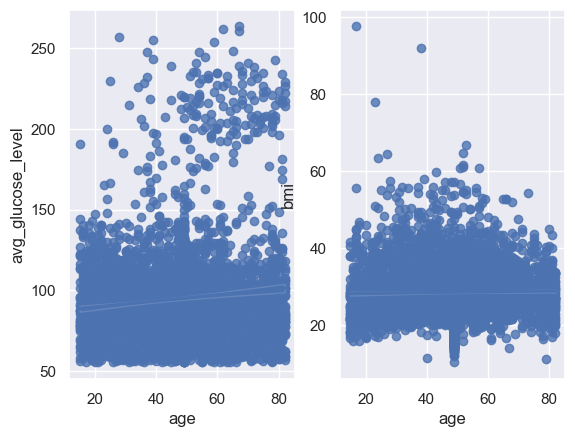

In [276]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
sns.regplot('age','avg_glucose_level', data = data, ax = ax1)
sns.regplot('age','bmi', data = data, ax = ax2)

<b>8. Describe the correlation of the data using a heatmap. Annotate the map.

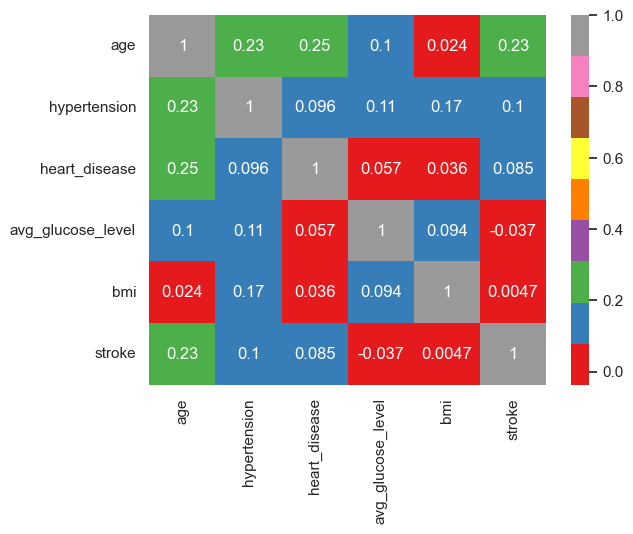

In [258]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues');